In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
file_path ='resources/defenders.csv'
defenders_df = pd.read_csv(file_path)
defenders_df['rating'] = (defenders_df['potential']+defenders_df['overall'])/2

defenders_df


,overall,potential,field_position,height,weight,crossing,finishing,heading_accuracy,short_passing,volleys,...,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rating
0,91,91,RCB,6'0,181,66.0,60.0,91.0,78.0,66.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,91.0
1,90,90,CB,6'2,172,55.0,42.0,92.0,79.0,47.0,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90.0
2,89,89,LCB,6'2,187,58.0,33.0,83.0,59.0,45.0,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,89.0
3,88,88,LCB,6'3,203,64.0,55.0,87.0,81.0,60.0,...,91.0,88.0,90.0,88.0,15.0,6.0,10.0,5.0,6.0,88.0
4,88,88,LB,5'9,176,90.0,70.0,75.0,84.0,54.0,...,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,48,66,RB,5'11,134,45.0,46.0,46.0,38.0,27.0,...,38.0,43.0,49.0,45.0,8.0,10.0,12.0,9.0,10.0,57.0
5862,47,59,RB,5'10,161,39.0,40.0,45.0,46.0,42.0,...,47.0,40.0,42.0,42.0,13.0,12.0,11.0,15.0,12.0,53.0
5863,47,65,LB,5'11,168,47.0,26.0,39.0,39.0,27.0,...,36.0,45.0,42.0,46.0,15.0,13.0,6.0,14.0,12.0,56.0
5864,47,64,RB,5'8,146,36.0,25.0,40.0,27.0,27.0,...,32.0,41.0,48.0,48.0,6.0,10.0,6.0,12.0,11.0,55.5


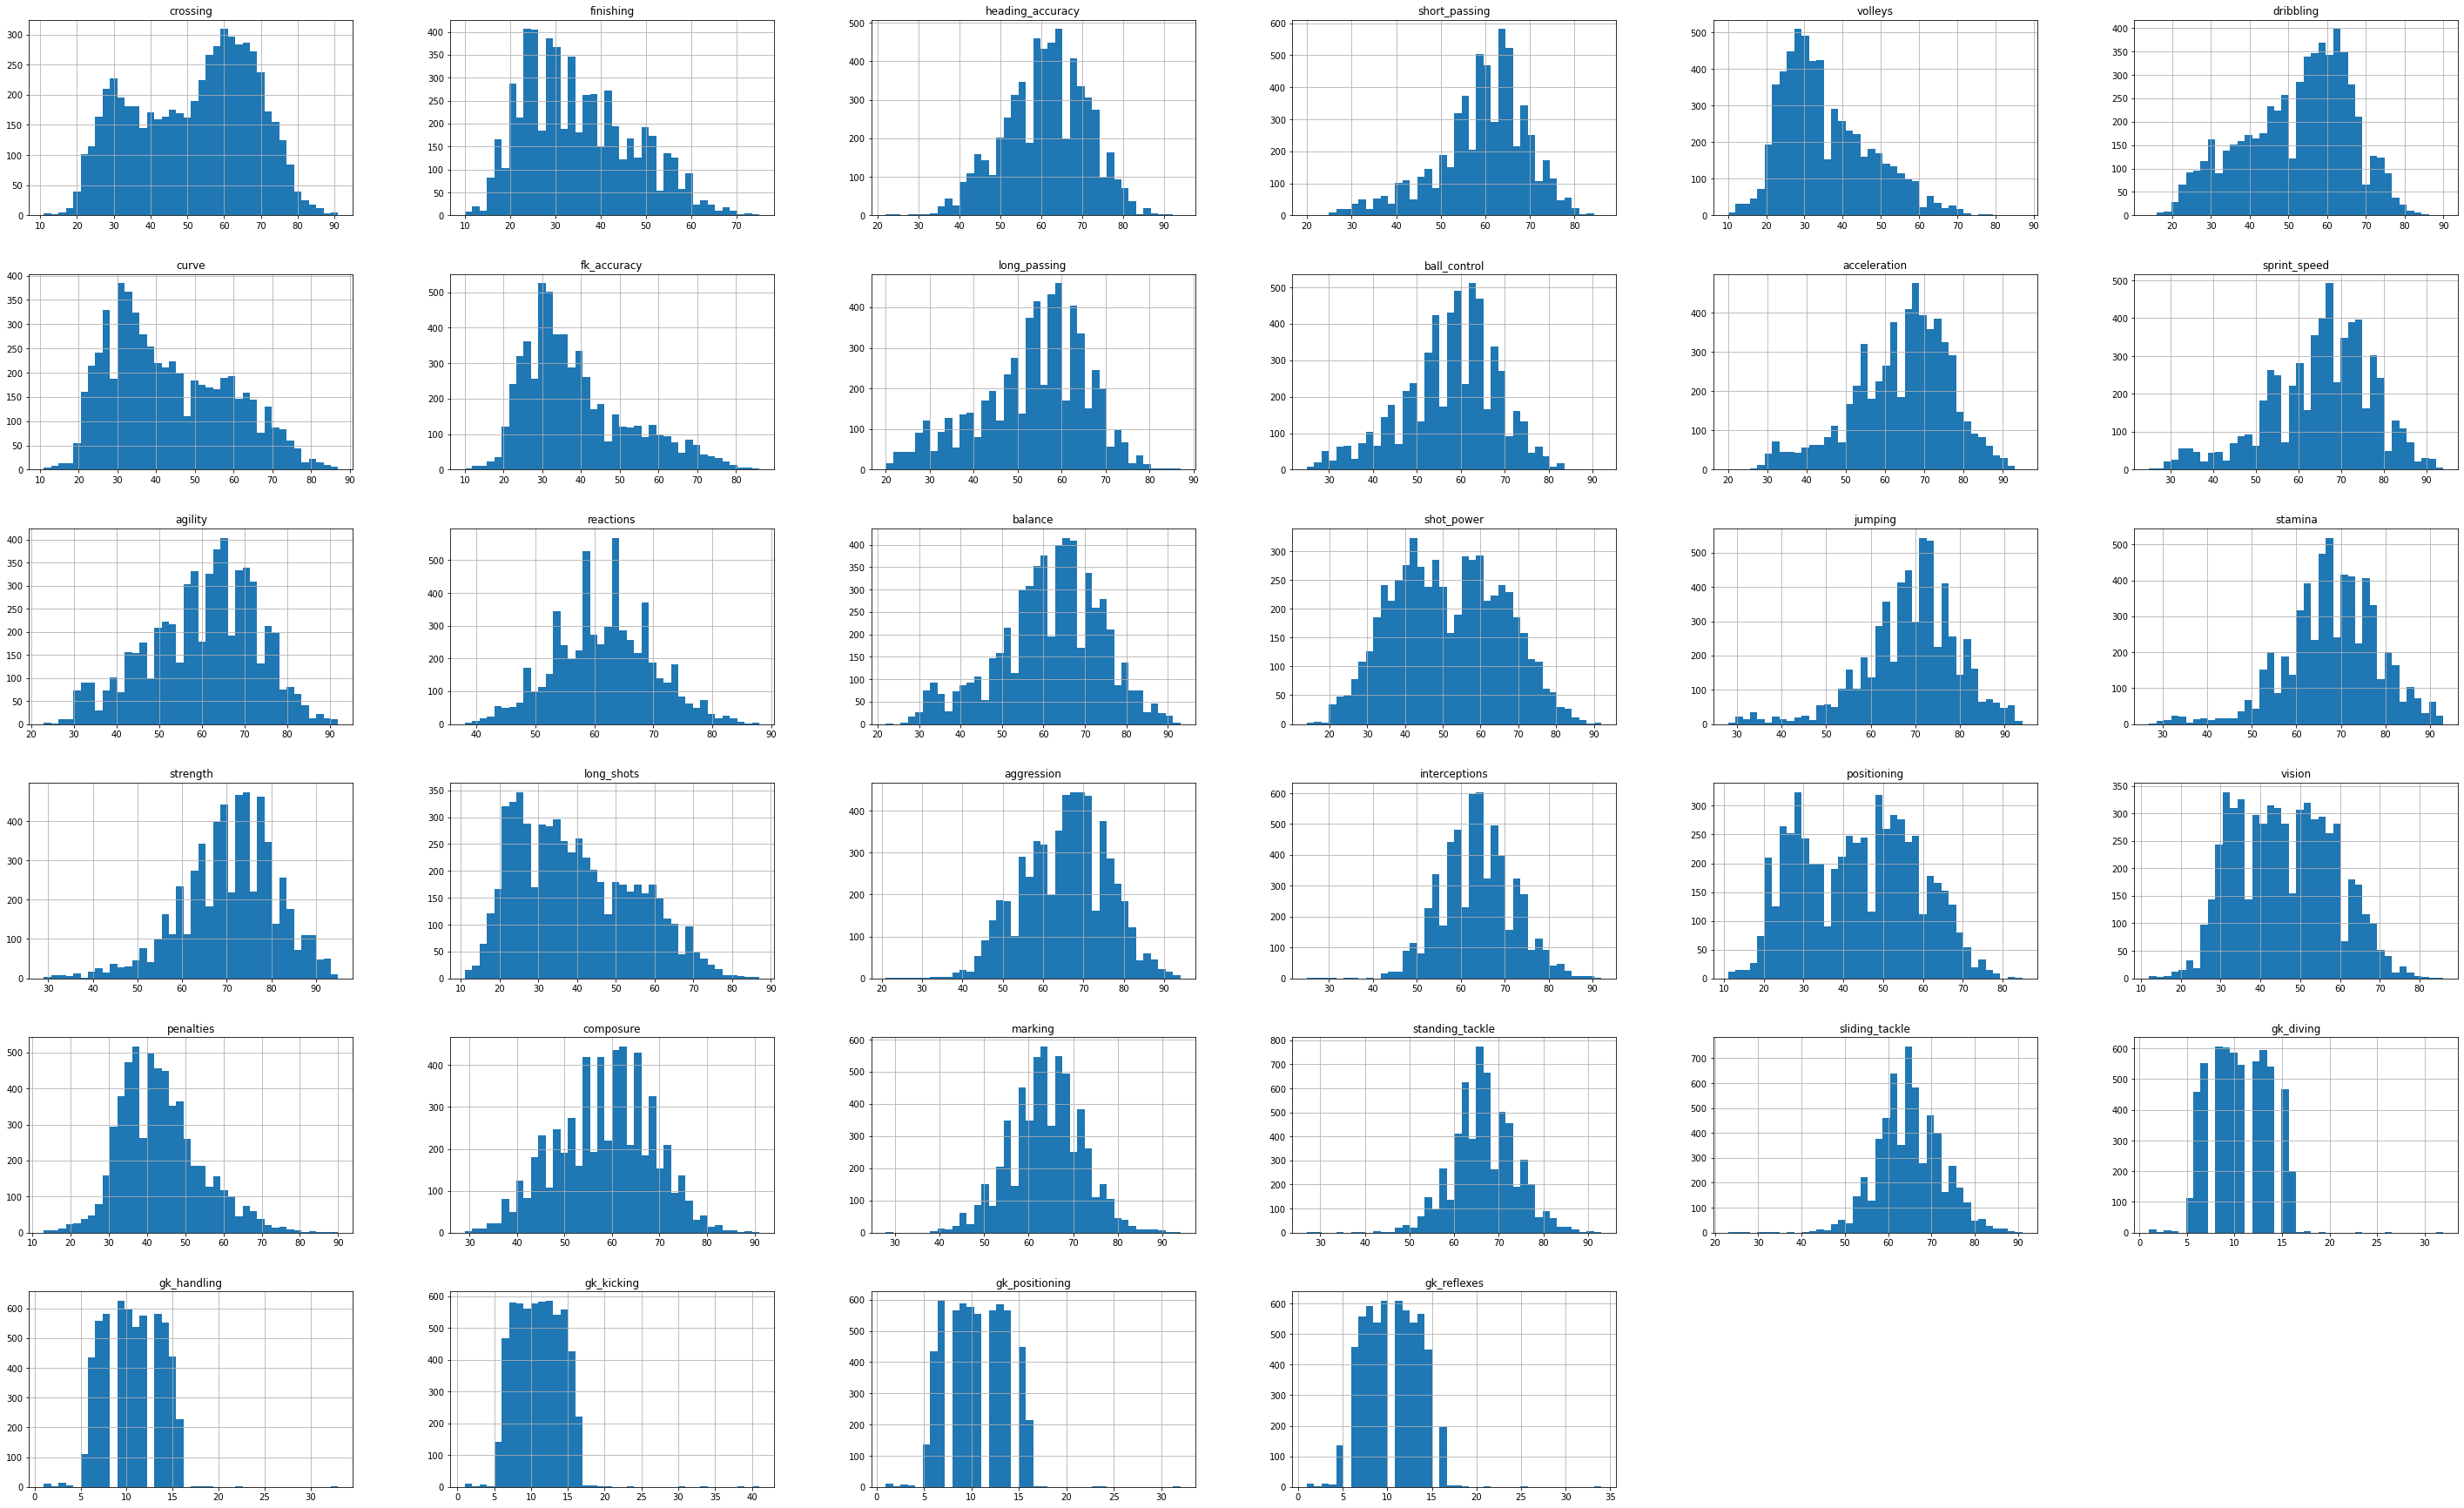

In [3]:
defenders_df.drop(['rating', 'weight', 'overall', 'potential'], axis = 1).hist(bins=40, figsize=(50,31))
plt.show()

In [4]:
defenders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5866 entries, 0 to 5865
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           5866 non-null   int64  
 1   potential         5866 non-null   int64  
 2   field_position    5866 non-null   object 
 3   height            5866 non-null   object 
 4   weight            5866 non-null   int64  
 5   crossing          5866 non-null   float64
 6   finishing         5866 non-null   float64
 7   heading_accuracy  5866 non-null   float64
 8   short_passing     5866 non-null   float64
 9   volleys           5866 non-null   float64
 10  dribbling         5866 non-null   float64
 11  curve             5866 non-null   float64
 12  fk_accuracy       5866 non-null   float64
 13  long_passing      5866 non-null   float64
 14  ball_control      5866 non-null   float64
 15  acceleration      5866 non-null   float64
 16  sprint_speed      5866 non-null   float64


In [5]:
defenders_df.isna().any()

overall             False
potential           False
field_position      False
height              False
weight              False
crossing            False
finishing           False
heading_accuracy    False
short_passing       False
volleys             False
dribbling           False
curve               False
fk_accuracy         False
long_passing        False
ball_control        False
acceleration        False
sprint_speed        False
agility             False
reactions           False
balance             False
shot_power          False
jumping             False
stamina             False
strength            False
long_shots          False
aggression          False
interceptions       False
positioning         False
vision              False
penalties           False
composure           False
marking             False
standing_tackle     False
sliding_tackle      False
gk_diving           False
gk_handling         False
gk_kicking          False
gk_positioning      False
gk_reflexes 

In [6]:
list(defenders_df)

['overall',
 'potential',
 'field_position',
 'height',
 'weight',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'rating']

In [7]:
# Define Columns we will include
columns = ['field_position', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'fk_accuracy',
    'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping',
    'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking',
    'standing_tackle', 'sliding_tackle', 'gk_diving','gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'rating']

# Create varible for players by position 
#defenders = ['RWB', 'RCB', 'RB', 'LCB', 'CB', 'LWB', 'LB']

# Fit columns into df
defenders_df = defenders_df[columns]

#Print df
defenders_df

,field_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,...,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rating
0,RCB,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,91.0
1,CB,55.0,42.0,92.0,79.0,47.0,53.0,49.0,51.0,70.0,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90.0
2,LCB,58.0,33.0,83.0,59.0,45.0,58.0,60.0,31.0,59.0,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,89.0
3,LCB,64.0,55.0,87.0,81.0,60.0,68.0,65.0,53.0,85.0,...,91.0,88.0,90.0,88.0,15.0,6.0,10.0,5.0,6.0,88.0
4,LB,90.0,70.0,75.0,84.0,54.0,90.0,85.0,67.0,76.0,...,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,RB,45.0,46.0,46.0,38.0,27.0,46.0,28.0,24.0,34.0,...,38.0,43.0,49.0,45.0,8.0,10.0,12.0,9.0,10.0,57.0
5862,RB,39.0,40.0,45.0,46.0,42.0,46.0,35.0,29.0,22.0,...,47.0,40.0,42.0,42.0,13.0,12.0,11.0,15.0,12.0,53.0
5863,LB,47.0,26.0,39.0,39.0,27.0,45.0,29.0,21.0,41.0,...,36.0,45.0,42.0,46.0,15.0,13.0,6.0,14.0,12.0,56.0
5864,RB,36.0,25.0,40.0,27.0,27.0,46.0,31.0,25.0,23.0,...,32.0,41.0,48.0,48.0,6.0,10.0,6.0,12.0,11.0,55.5


In [8]:
#Create train_set and test_set
train_set, test_set = train_test_split(defenders_df, test_size=0.2, random_state=42)
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(defenders_df))

target_train = train_set['rating']
train_set = train_set.drop(['rating'], axis = 1)

Length of training data: 4692
Length of testing data: 1174
Length of total data: 5866


In [9]:

corr_matrix = defenders_df.corr()
corr_matrix['rating'].sort_values(ascending=False)

rating              1.000000
standing_tackle     0.837367
sliding_tackle      0.812527
interceptions       0.804380
marking             0.775996
reactions           0.766654
composure           0.695349
short_passing       0.668748
ball_control        0.612604
heading_accuracy    0.599884
long_passing        0.577278
aggression          0.563374
shot_power          0.458836
vision              0.387683
dribbling           0.385247
long_shots          0.347024
curve               0.328055
strength            0.322276
stamina             0.321286
finishing           0.302182
volleys             0.301552
penalties           0.299555
crossing            0.284570
fk_accuracy         0.264431
positioning         0.241580
jumping             0.230005
sprint_speed        0.204949
agility             0.148715
acceleration        0.130251
gk_kicking          0.033476
gk_diving           0.024006
gk_positioning      0.012174
gk_handling         0.006235
gk_reflexes         0.003270
balance       

In [11]:
for position in defenders_df['field_position'].unique(): 
    
    try:
    
        # Subset by position
        temp_df = defenders_df[defenders_df['field_position'] == position]

        # Find correlations
        temp_corr = defenders_df[defenders_df['field_position'] == position].corr()['rating'].to_frame()
        temp_corr = temp_corr[temp_corr['rating'] > 0.5]


        # Keep only columns with correltion above 0.5
        temp_features = list(temp_corr.T)
        temp_model_df = temp_df[temp_features]

        #print(temp_features)
        # Split data into train and test, isolate y (target/dependent variable)
        train_set, test_set = train_test_split(temp_model_df, test_size=0.2, random_state=42)
        target_train = train_set['rating']
        train_set = train_set.drop(['rating'], axis = 1) #, 'potential', 'overall'], axis = 1)
        

        # Fit model
        train_set = sm.add_constant(train_set, prepend=False)

        # Fit and summarize OLS model
        mod = sm.OLS(target_train, train_set)

        res = mod.fit()
        
        features = pd.DataFrame([res.pvalues, res.params]).T
        features.columns = ['P-value', 'Coefficient']
        features = features[features['P-value']<0.05]
        features = features.sort_values(by = 'Coefficient', ascending = False)
    

        print(f' ********* Current Position: {position}: \n ')
        print(f' ********* Significant features in order of impact: {features.index}: \n ')
        print(res.summary())
        print('\n')
        
    except BaseException as e: 
        print(f'WARNING: SKIPPING {position} due to {e}')

 ********* Current Position: RCB: 
 
 ********* Significant features in order of impact: Index(['const', 'standing_tackle', 'marking', 'sliding_tackle',
       'heading_accuracy', 'short_passing', 'ball_control', 'interceptions',
       'reactions', 'aggression', 'long_passing'],
      dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     343.8
Date:                Thu, 15 Jul 2021   Prob (F-statistic):          1.34e-229
Time:                        21:58:17   Log-Likelihood:                -1077.9
No. Observations:                 529   AIC:                             2180.
Df Residuals:                     517   BIC:                             2231.
Df Model:                          11                        

 
 ********* Significant features in order of impact: Index(['const', 'short_passing', 'ball_control', 'long_passing'], dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     16.40
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           1.05e-13
Time:                        21:58:17   Log-Likelihood:                -135.33
No. Observations:                  62   AIC:                             304.7
Df Residuals:                      45   BIC:                             340.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.02

The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase.